# KNN: K-Nearest Neighbors (K-vizinhos mais próximos)

### Objetivos dessa aula:
* apresentar o conceito do algoritmo de KNN
* explicar a diferença do KNN aplicado em problemas de regressão e classificação
* apresentar um caso prático de KNN
* prós e contras dessa abordagem



## Intuição
Se tivéssemos que definir que animal esse ponto de interrogação representa, vocês diriam que é um cachorro ou um cavalo?

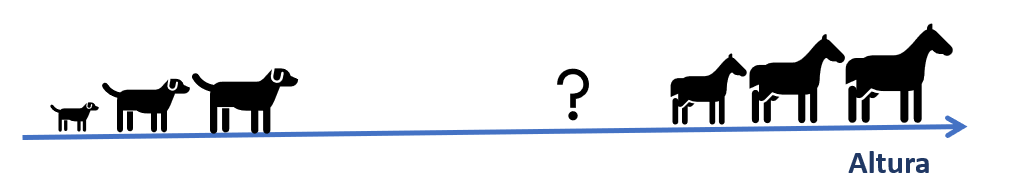

Suponha que as alturas em metros sejam, da esquerda para direita, 0.1, 0.4, 0.8, 1.4, 1.7, 2.0. Como você escreveria um programa para detectar qual é o animal do ponto de interrogação dado que ele tem 1.2 de altura?

In [56]:
# Código
cachorro1 = 1.2 - 0.1
cachorro2 = 1.2 - 0.4
cachorro3 = 1.2 - 0.8



print(cachorro1)
print(cachorro2)
print(cachorro3)

1.0999999999999999
0.7999999999999999
0.3999999999999999


In [57]:
cavalo1 = -1.2 + 1.4
cavalo2 = -1.2 + 1.7
cavalo3 = -1.2 + 2



print(cavalo1)
print(cavalo2)
print(cavalo3)

0.19999999999999996
0.5
0.8


In [59]:
import numpy as np
cachorro=np.array([0.1, 0.4, 0.8])
cavalo=np.array([1.4, 1.7, 2.0])
altura = 1.2

In [62]:
dist_cachorro = min(abs(cachorro - altura))
dist_cachorro

0.3999999999999999

In [63]:
dist_cavalo = min(abs(cavalo - altura))
dist_cavalo

0.19999999999999996

In [64]:
if dist_cavalo < dist_cachorro:
    print('cavalo')
elif dist_cavalo > dist_cachorro:
    print('cachorro')
else:
    print('indefinido')

cavalo


In [55]:
cachorro

array([0.1, 0.4, 0.8])

E se além da altura também tivéssemos o peso dele em kg, como você escreveria um código para detectar qual é o bicho que queremos descobrir?<br>

**Desafio** (opcional): Escreva um código e considere os pesos, da esqueda para a direita: 5, 30, 50, 100, 180, 220 e o peso do animal desconhecido como 87kg

In [1]:
# Código


O KNN segue essa mesma lógica de encontrar quem são os k vizinhos mais próximos

### Funcionamento do KNN
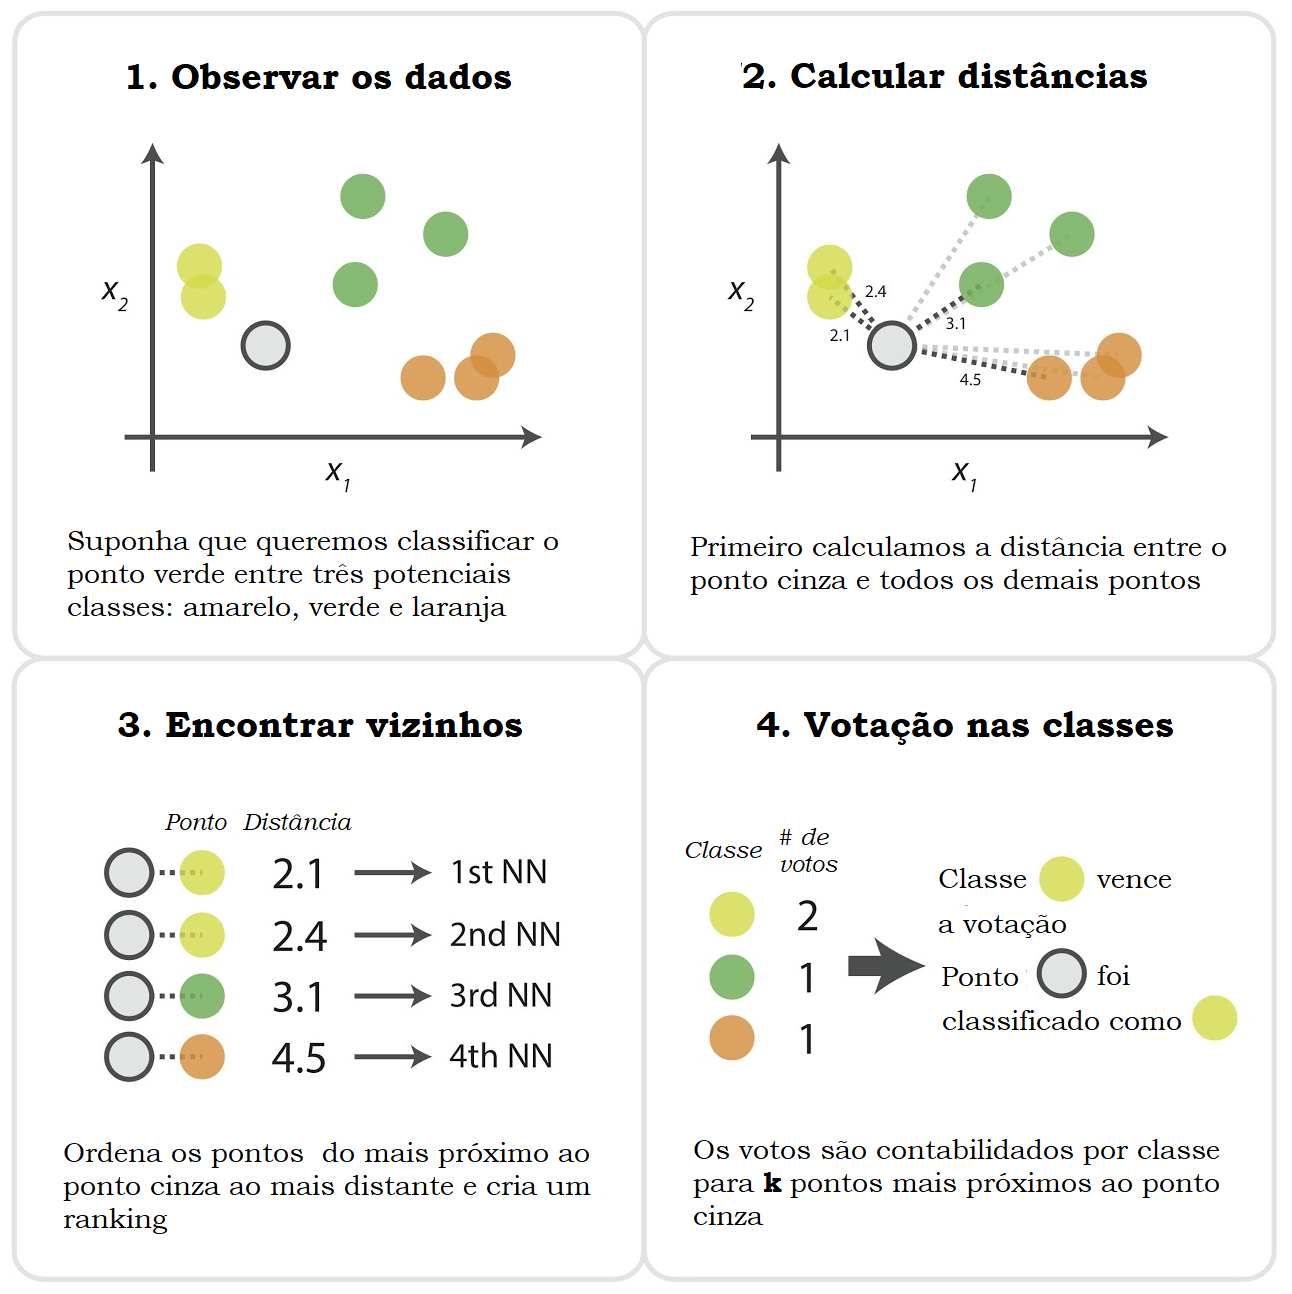

Fonte: https://cambridgecoding.wordpress.com/

### Perguntas: 
1 - E se eu tivesse uma amostra nova, como faço para definir a que classe ela pertence? <br>
2 - E se eu tivesse uma base com muitos dados? <br>
3 - Como ficaria a votação em um problema de regressão?
 <br>
 <br>
 <br>
  <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
  <br>
 <br>
 <br>
  <br>
 <br>
 <br>

#### Resposta:
Em um problema de classificação selecionamos a classe mais frequente (moda) entre os k vizinhos mais próximos enquanto na regressão calculamos a média dos k valores target mais próximos. <br>

### Regressão em 1D

<img src="images\knn_regressão0.png" alt="Drawing" style="width: 400px;"/>
<img src="images\knn_regressão1.png" alt="Drawing" style="width: 400px;"/>
<img src="images\knn_regressão3.png" alt="Drawing" style="width: 400px;"/>
<img src="images\knn_regressão4.png" alt="Drawing" style="width: 400px;"/>
<img src="images\knn_regressão5.png" alt="Drawing" style="width: 400px;"/>


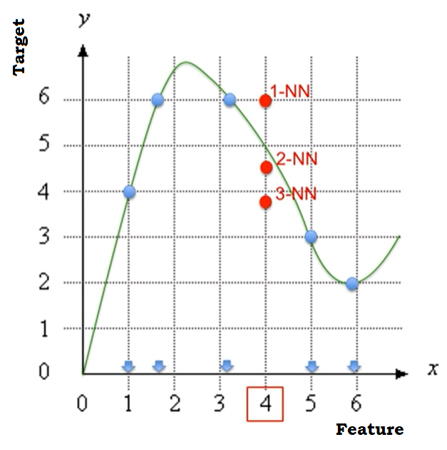

### Regressão 2D

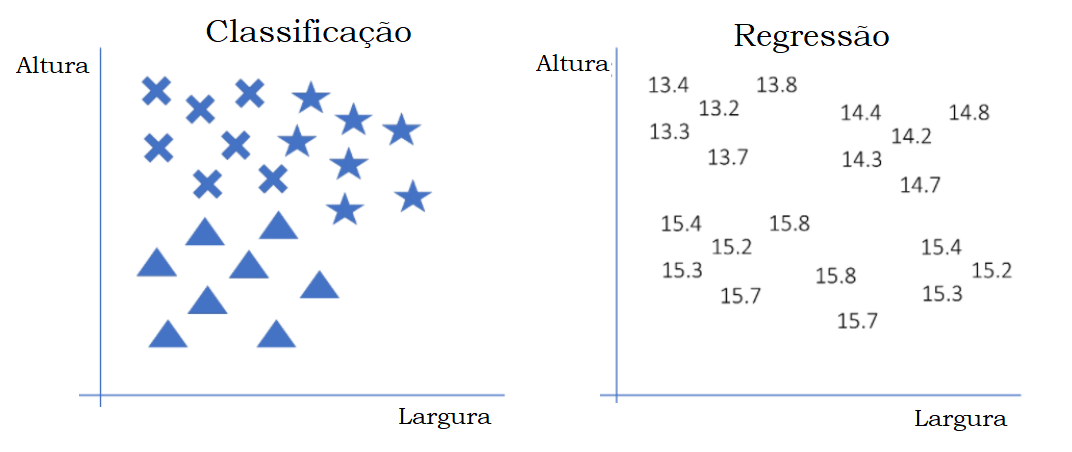
Fonte: https://realpython.com/knn-python/


### Retomando <br>

KNN é um modelo baseado na **distância** entre os elementos pois ele parte da premissa que **observações similares** estarão **próximas** umas das outras enquanto **observações diferentes** estarão mais **distante**. 
<br>
<br>

Podemos calcular a distância entre dois pontos p e q usando a **distância Euclidiana**, definida como

$$ \begin{align} d(p,q)=\sqrt{\sum \limits _{i=1} ^n (p_i−q_i)^2} \end{align} $$
    
onde $p_i$ e $q_i$ representam o valor do atributo i para os pontos p e q e a soma é feita em todas as n dimensões (features).
<br>
<br>

Os passos realizados pelo algoritmo são: <br>
1 - Calcular a distância entre o ponto de interesse e os demais pontos <br>
2 - Rankear os pontos pela menor distância <br>
3 - Encontrar os k pontos/vizinhos mais próximos <br>
4 - Votar o label para o ponto a ser previsto ou realizar uma média entre os pontos <br>
<br>
Se em um problema de classificação tivermos n classes **evitar usar k múltiplo de n** para não termos empate de classes e **nem k pares**. Exemplo: em um problema como o mostrado acima com 3 classes, se usarmos k=3 podemos ter uma situação em que os três pontos mais próximos perteçam à classes diferentes
<br><br>
E como vimos podemos utilizá-lo tanto em um problema de **classificação** quanto **regressão**.



## Caso prático
Vamos aplicar o KNN em um caso prático e discutir outros pontos essenciais sobre o modelo.
<br>

#### Problema:
Queremos predizer se um usuário que clicou no nosso anúncio em uma rede social irá realizar uma compra. Nesse caso, temos um problema de classificação binário.
<br> <br>
Fonte dos dados:https://www.kaggle.com/rakeshrau/social-network-ads

In [149]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar o dataset
dataset = pd.read_csv('Social_Network_Ads.csv').drop('Gender', axis=1)
dataset.head()

User ID  Age  EstimatedSalary  Purchased
0  15624510   19            19000          0
1  15810944   35            20000          0
2  15668575   26            43000          0
3  15603246   27            57000          0
4  15804002   19            76000          0

##### Metadados
*User ID:* identificador único do usuário (variável inteira positiva) <br>
*Gender:* gênero do usuário (variável binária string) <br>
*Age:* idade do usuário (variável inteira positiva) <br>
*Estimated Salary:* salário estimado da pessoa (variável inteira positiva) <br>
*Purchased:* indica se o usuário realizou ou não uma compra (booleana numérica)

### Data Analysis

In [40]:
# Encontre as estatísticas básicas do dataset


Vamos fazer um rápido EDA utilizando a seaborn

In [41]:
# Faça um displot da coluna Age utilizando Purchase nas cores


In [42]:
# Faça um displot da coluna EstimatedSalary utilizando Purchase nas cores


In [43]:
# Calcule a quantidade de amostra em cada classe


O dataset está desbalanceado

In [44]:
# Checar se temos nulos


<br>

### Processamento dos Dados

In [45]:
# Definir variável target
target = 'Purchased'

# Separar as variáveis independentes do target


#### Separação dos dados em um dataset de treino e um de teste

Quando treinamos um modelo é necessário testá-lo em um conjunto de teste. Isso ajuda a validar o quanto seu modelo consegue generalizar e a ajustar melhor o modelo.

<img src="images/splitting-data-set.png"  style="width: 400px" />

In [46]:
# Utilizar o train_test_split do sklearn.model_selection para
# separar um dataset para treino e outro para teste (80/20) com random_state = 0


#### Pré-processamento:
Como nossos dados tem escalas muito diferentes (Estimated Salary é da ordem de 1000x maior que o Age) e o KNN depende da distância, nós temos que normalizar nossos dados. <br> <br>
LEMBRETE:  a normalização NUNCA deve acontecer ANTES da separação em treino e teste. Essa é uma das formas mais comuns de leakage

In [47]:
# Utilizar o MinMaxScaler do sklearn.preprocessing para
# normalização dos dados com Min Max


### Treino do modelo e previsão

In [180]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=3 # quantidade de vizinhos 
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2) # use p=2 para distância euclidiana
clf.fit(X_train, y_train)

# Predizendo no dataset de teste
y_pred = clf.predict(X_test)
y_pred[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([0, 0, 0, 0, 0])

### Avaliação do modelo utilizando matriz de confusão

Acurácia do modelo: 95.0%


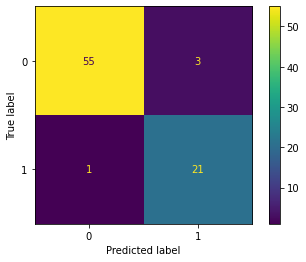

In [183]:
# Importar accuracy_score e plot_confusion_matrix do sklearn.metrics 
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Calcular a acurácia utilizando o accuracy_score
ac = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {ac:.1%}")

plot_confusion_matrix(clf, X_test, y_test);

## Voilá! Está pronto nosso primeiro KNN. Ele servirá como baseline de comparação para as melhorias.

## Melhorias:
* Definir o melhor valor para K
* Definir qual melhor métrica de distância:
* Considerar pesos maiores para pontos mais próximos
* Considerar pesos maiores para features mais importantes
* Balancear classes
* Escolher uma métrica melhor para avaliar datasets desbalanceados

## Principais pontos do KNN:
* É um algoritmo supervisionado, ou seja, precisa de uma variável de target <br>
* É um algoritmo preguiçoso (lazy) pois realiza todos os cálculos na fase de teste. <br>

#### Prós 

1 – Aplicável tanto para problemas de classificação (target são classes) quanto de regressão (target contínuo) <br>
2 – É um dos mais simples algoritmos a se implementar.  <br>
3 – Modelos mais complexos, como uma rede neural, necessitam de uma quantidade maior de dados para serem treinados que o KNN. <br>
4 – Poucos paramêtros para tunning (Valor de K, Medida de Distância e peso nas distâncias) <br>
5 – O tempo de treinamento é utilizado para "memorizar" os dados. Ele armazena os dados na RAM. Por isso ele possui um dos fit mais rápidos. <br>
6 – O KNN pode ser utilizado em dados não lineares bem como para problemas de regressão. <br>
7 – Facilmente interpretável <br>
8 – É um Algoritmo de Aprendizagem Não Linear, ou seja, não utiliza linhas e hiperplanos para separar os dados <br>
9 – Pode ser aplicado em casos que temos pouca quantidade de dados <br>


#### Contras

1 – Demora excessiva na fase de teste e alto consumo de memória para realizar esta atividade, uma vez que ele armazena todo dataset em memória. (KDtrees e BallTrees)<br>
2 – KNN não é indicado a dados de grandes dimensões, devido à demora em calcular a distância de todos os pontos de dados entre si. <br>
3 – Como ele depende de medidas de distância é importante se atentar a escala dos valores utilizados. <br>
4 – Classes muito desbalanceadas fazem com que a classe marjoritária domine na votação <br>
5 – Dimensões irrelevantes podem causar ruídos nos dados


## Próxima aula:
* Medidas de distância
        * Distância Euclidiana
        * Distância Manhattan
        * Distância de Hamming
* Como escolher o melhor valor de K e a melhor métrica de distância - conjunto de validação
* Como avaliar overfitting e underfitting 
* O que fazer quando temos um dataset muito grande
* Maldição da dimensionalidade

### Bibliografia
https://www.slideshare.net/jorisschelfaut/knn-154482179 <br>
https://www.kaggle.com/rakeshrau/social-network-ads <br>
https://realpython.com/knn-python/ <br>
https://cambridgecoding.wordpress.com/
https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
